<a href="https://colab.research.google.com/github/KingBeeM/Daily_Coding/blob/main/Python/20230417_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## matplotlib + seaborn

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, FuncFormatter)

def major_formatter(x, pos):
  """
  User functions to append units to more accurately convey data visually
  """
  return "%.2f$" % x

formatter = FuncFormatter(major_formatter)
formatter

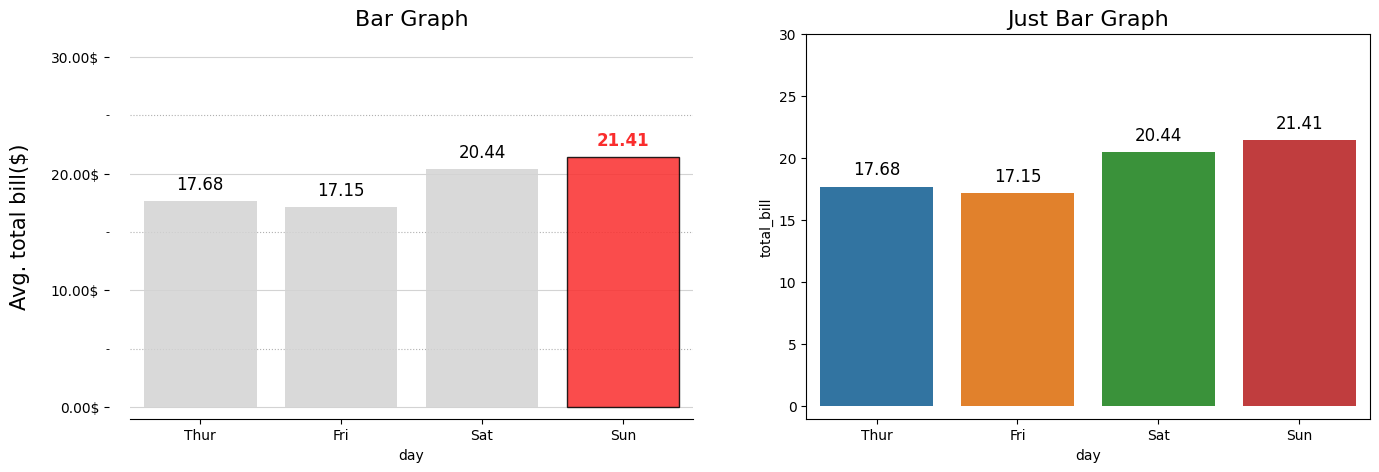

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
ax_0 = sns.barplot(x = "day",
            y = "total_bill",
            data = tips,
            errorbar = None,
            color ="lightgray",
            alpha = 0.85,
            ax = ax[0],
            zorder=2
            )

ax_1 = sns.barplot(x = "day",
            y = "total_bill",
            data = tips,
            errorbar = None,
            ax = ax[1],
            )


group_mean = tips.groupby(["day"])["total_bill"].agg("mean")
h_day = group_mean.sort_values(ascending=False).index[0]
h_mean = np.round(group_mean.sort_values(ascending=False).values[0], 2)

for p in ax_0.patches:
  fontweight = "normal"
  color = "k"
  height = np.round(p.get_height(), 2)

  if h_mean == height:
    fontweight = "bold"
    color = "#FA2D2D"
    p.set_facecolor(color)
    p.set_edgecolor("black")
  
  ax_0.text(p.get_x() + p.get_width()/2.,
            height+1,
            height,
            ha = "center",
            size=12,
            fontweight=fontweight,
            color=color)
  
for p in ax_1.patches:
  fontweight ="normal"
  color = "k"
  height = np.round(p.get_height(), 2)

  ax_1.text(p.get_x() + p.get_width()/2.,
            height+1,
            height,
            ha = "center",
            size=12,
            fontweight=fontweight,
            color=color)

ax_0.set_ylim(-1, np.ceil(h_mean+10))
ax_0.set_title("Bar Graph", size = 16)

ax_0.spines["top"].set_visible(False)
ax_0.spines["right"].set_visible(False)
ax_0.spines["left"].set_position(("outward", 15))
ax_0.spines["left"].set_visible(False)

ax_0.yaxis.set_major_locator(MultipleLocator(10))
ax_0.yaxis.set_major_formatter(formatter)
ax_0.yaxis.set_minor_locator(MultipleLocator(5))

ax_0.set_ylabel("Avg. total bill($)", fontsize=15, labelpad=15, loc="center")

ax_0.grid(axis="y", which="major", color="lightgray")
ax_0.grid(axis="y", which="minor", ls=":")

ax_1.set_title("Just Bar Graph", size = 16)
ax_1.set_ylim(-1, 30)

plt.show()

In [ ]:
group_mean = tips.groupby(["day"])["total_bill"].agg("mean")
group_mean

day
Thur    17.682742
Fri     17.151579
Sat     20.441379
Sun     21.410000
Name: total_bill, dtype: float64

In [ ]:
# sort_values 했을 때, 0 번 째 index 가 가장 큰 값이기 때문에.
h_day = group_mean.sort_values(ascending=False).index[0]
h_mean = np.round(group_mean.sort_values(ascending=False).values[0], 2)
h_day, h_mean

('Sun', 21.41)

## Plotly
참조 : https://plotly.com/python/graph-objects/

In [ ]:
# data import

import pandas as pd

df = pd.DataFrame({
  "Fruit": ["Apples", "Oranges", "Bananas", "Apples", "Oranges", "Bananas"],
  "Contestant": ["Alex", "Alex", "Alex", "Jordan", "Jordan", "Jordan"],
  "Number Eaten": [2, 1, 3, 1, 3, 2],
})
df

,Fruit,Contestant,Number Eaten
0,Apples,Alex,2
1,Oranges,Alex,1
2,Bananas,Alex,3
3,Apples,Jordan,1
4,Oranges,Jordan,3
5,Bananas,Jordan,2


In [ ]:
# plotly import

import plotly
print(plotly.__version__)

5.13.1


In [ ]:
# plotly.graph_objects test

import plotly.graph_objects as go
fig = go.Figure()
for contestant, group in df.groupby("Contestant"):
  fig.add_trace(go.Bar(x=group["Fruit"], y=group["Number Eaten"],
                       name = contestant,
                       hovertemplate="Contestant=%s<br>Fruit=%%{x}<br>Number Eaten=%%{y}<extra></extra>"% contestant))

fig.update_layout(title="Graph_objects Plot", legend_title_text="Contestant")
fig.update_xaxes(title_text="Fruit")
fig.update_yaxes(title_text="Number Eaten")
fig.show()

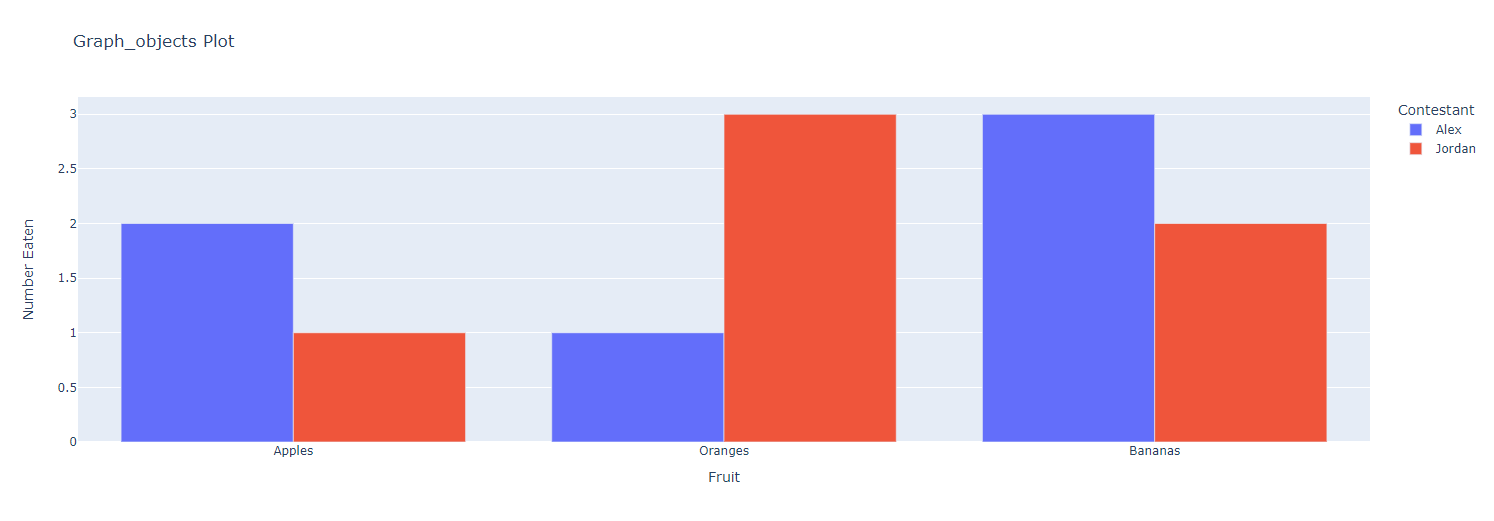

In [ ]:
# plotly.express test
# return graph_objects

import plotly.express as px
fig = px.bar(df, x ="Fruit", y = "Number Eaten",
             color = "Contestant", barmode="group")
fig.update_layout(title = "Express Chart")
fig.show()

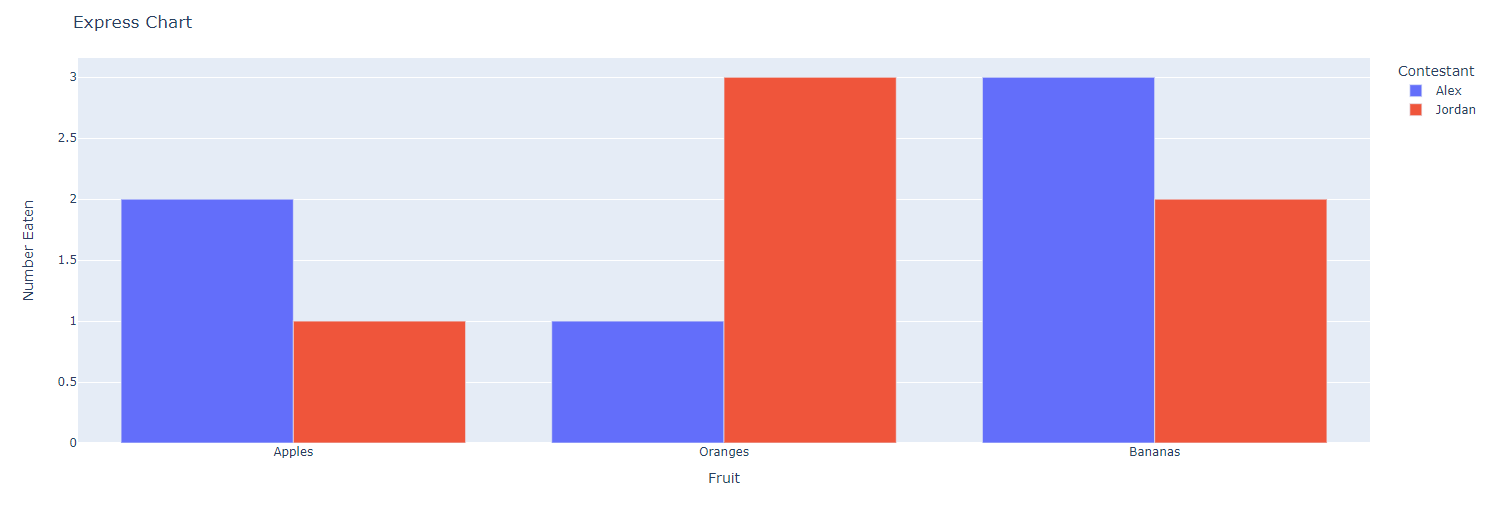

### 데이터 불러오기
- raw_sales.csv 파일

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

DATA_PATH="/content/drive/MyDrive/2023/YS/Python_Colab/Data/"
DATA_PATH

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'/content/drive/MyDrive/2023/YS/Python_Colab/Data/'

In [ ]:
import pandas as pd
sales = pd.read_csv(DATA_PATH + "raw_sales.csv", encoding="cp949", parse_dates=["datesold"]) # parse_dates=["datesold"] : objects 타입의 데이터 타입을 datetime 으로 변경
sales

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07,2607,525000,house,4
1,2007-02-27,2906,290000,house,3
2,2007-03-07,2905,328000,house,3
3,2007-03-09,2905,380000,house,4
4,2007-03-21,2906,310000,house,3
...,...,...,...,...,...
29575,2019-07-25,2900,500000,unit,3
29576,2019-07-25,2612,560000,unit,2
29577,2019-07-26,2912,464950,unit,2
29578,2019-07-26,2601,589000,unit,2


In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29580 entries, 0 to 29579
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datesold      29580 non-null  datetime64[ns]
 1   postcode      29580 non-null  int64         
 2   price         29580 non-null  int64         
 3   propertyType  29580 non-null  object        
 4   bedrooms      29580 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 1.1+ MB


In [ ]:
# 컬럼명 : year / year 추출
# groupby 연산, 기준컬럼 year, 대상컬럼 price 평균

sales["year"] = sales["datesold"].dt.year
sales_year = sales.groupby("year")["price"].mean().reset_index()
sales_year

,year,price
0,2007,522377.210884
1,2008,493814.162754
2,2009,496092.032959
3,2010,559564.810289
4,2011,566715.110227
5,2012,552501.369214
6,2013,553416.296838
7,2014,592653.761439
8,2015,626101.342654
9,2016,635185.311668


In [ ]:
import plotly.express as px

# 중복 데이터로 인해서 그래프가 나오지 않음

fig = px.line(sales, x = "datesold", y = "price")
fig.show()

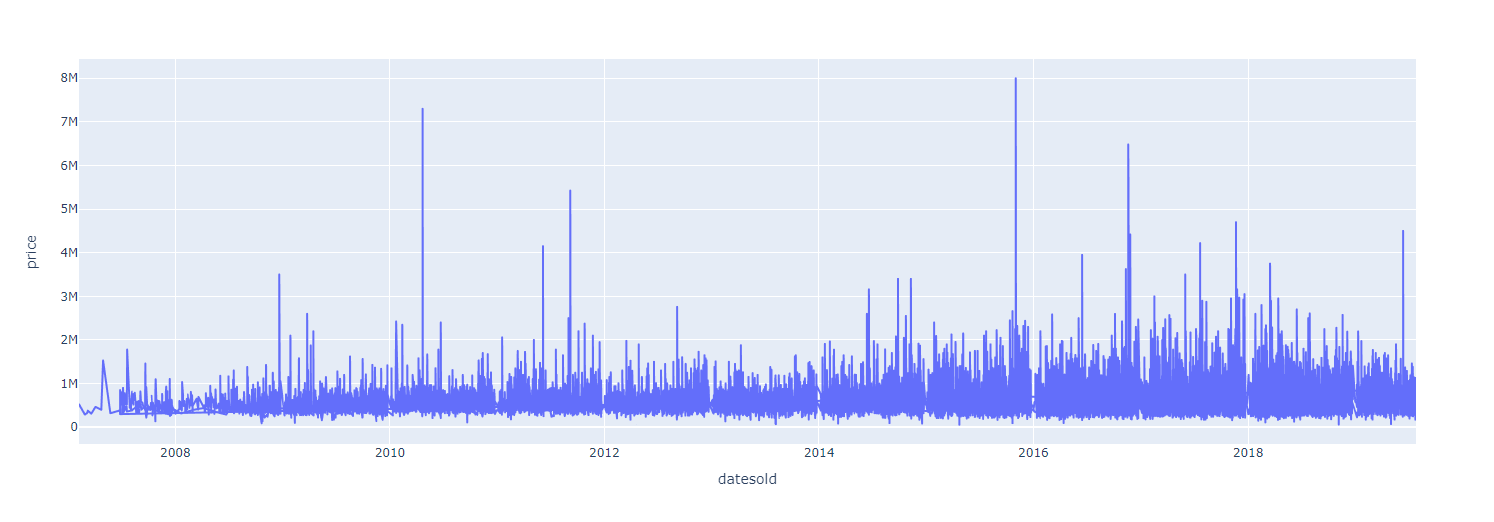

In [ ]:
# 날짜에 대해서 groupby

result = sales.groupby("datesold")["price"].agg("mean")
result = pd.DataFrame(result).reset_index()
result

,datesold,price
0,2007-02-07,525000.000000
1,2007-02-27,290000.000000
2,2007-03-07,328000.000000
3,2007-03-09,380000.000000
4,2007-03-21,310000.000000
...,...,...
3577,2019-07-23,562123.333333
3578,2019-07-24,482500.000000
3579,2019-07-25,547800.000000
3580,2019-07-26,594408.333333


In [ ]:
# 파생 데이터 year 에 대해서 groupby

result = sales.groupby("year")["price"].agg("mean")
result = pd.DataFrame(result).reset_index()
result

,year,price
0,2007,522377.210884
1,2008,493814.162754
2,2009,496092.032959
3,2010,559564.810289
4,2011,566715.110227
5,2012,552501.369214
6,2013,553416.296838
7,2014,592653.761439
8,2015,626101.342654
9,2016,635185.311668


In [ ]:
fig = px.line(sales_year, x = "year", y="price")
fig.show()

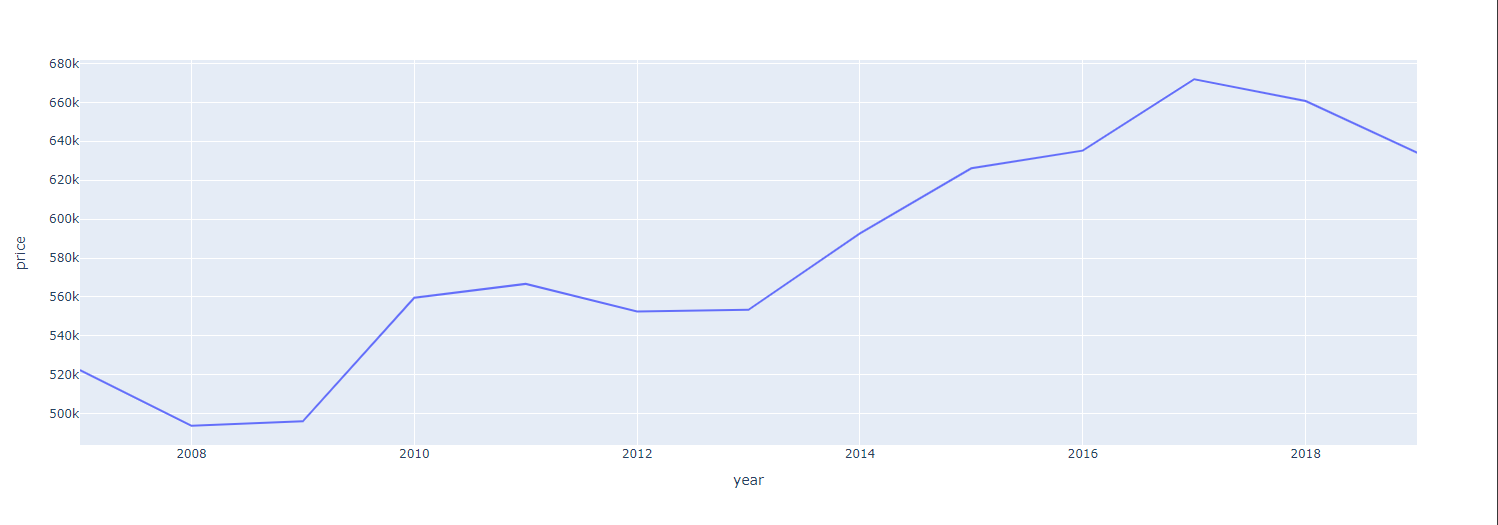

In [ ]:
sales["month"] = sales["datesold"].dt.month
sales

,datesold,postcode,price,propertyType,bedrooms,year,month
0,2007-02-07,2607,525000,house,4,2007,2
1,2007-02-27,2906,290000,house,3,2007,2
2,2007-03-07,2905,328000,house,3,2007,3
3,2007-03-09,2905,380000,house,4,2007,3
4,2007-03-21,2906,310000,house,3,2007,3
...,...,...,...,...,...,...,...
29575,2019-07-25,2900,500000,unit,3,2019,7
29576,2019-07-25,2612,560000,unit,2,2019,7
29577,2019-07-26,2912,464950,unit,2,2019,7
29578,2019-07-26,2601,589000,unit,2,2019,7


In [ ]:
result = sales.groupby(["year","month"])["price"].agg("mean")
result = pd.DataFrame(result).reset_index()
result

,year,month,price
0,2007,2,407500.000000
1,2007,3,339333.333333
2,2007,4,798000.000000
3,2007,5,339500.000000
4,2007,6,520333.333333
...,...,...,...
145,2019,3,651666.737288
146,2019,4,655325.561321
147,2019,5,641491.136364
148,2019,6,703275.396825


In [ ]:
# 2008 년, 2018 년 데이터 추출
result = sales[sales["year"].isin([2008, 2018])]
result

,datesold,postcode,price,propertyType,bedrooms,year,month
130,2008-01-02,2906,309000,house,2,2008,1
131,2008-01-14,2602,413000,house,3,2008,1
132,2008-01-15,2905,445000,house,4,2008,1
133,2008-01-15,2902,600000,house,4,2008,1
134,2008-01-17,2605,417500,house,2,2008,1
...,...,...,...,...,...,...,...
29212,2018-12-21,2615,323000,unit,2,2018,12
29213,2018-12-21,2604,475000,unit,2,2018,12
29214,2018-12-21,2914,495000,unit,3,2018,12
29215,2018-12-21,2602,535000,unit,3,2018,12


In [ ]:
import numpy as np
result = np.round(result.groupby(["year", "month"])["price"].agg(np.mean).reset_index(), 2)
result

,year,month,price
0,2008,1,504428.57
1,2008,2,531080.00
2,2008,3,563500.00
3,2008,4,534204.55
4,2008,5,522394.74
5,2008,6,539092.65
6,2008,7,537453.12
7,2008,8,449510.42
8,2008,9,496778.65
9,2008,10,454822.04


### 그래프 꾸미기 (Line Graph)

In [ ]:
import plotly.express as px
fig  = px.line(result, x = "month", y = "price", color = "year")
fig.update_layout(title="year & price",
                  title_x=0.5,
                  title_y=0.95,
                  title_xanchor="center",
                  title_yanchor="middle",
                  plot_bgcolor="white",
                  paper_bgcolor="grey")
fig.update_xaxes(
    mirror=True,
    ticks="outside",
    showline=True,
    linecolor="black",
    gridcolor="lightgrey"
)
fig.update_yaxes(
    mirror=True,
    ticks="outside",
    showline=True,
    linecolor="black",
    gridcolor="lightgrey"
)
fig.show()

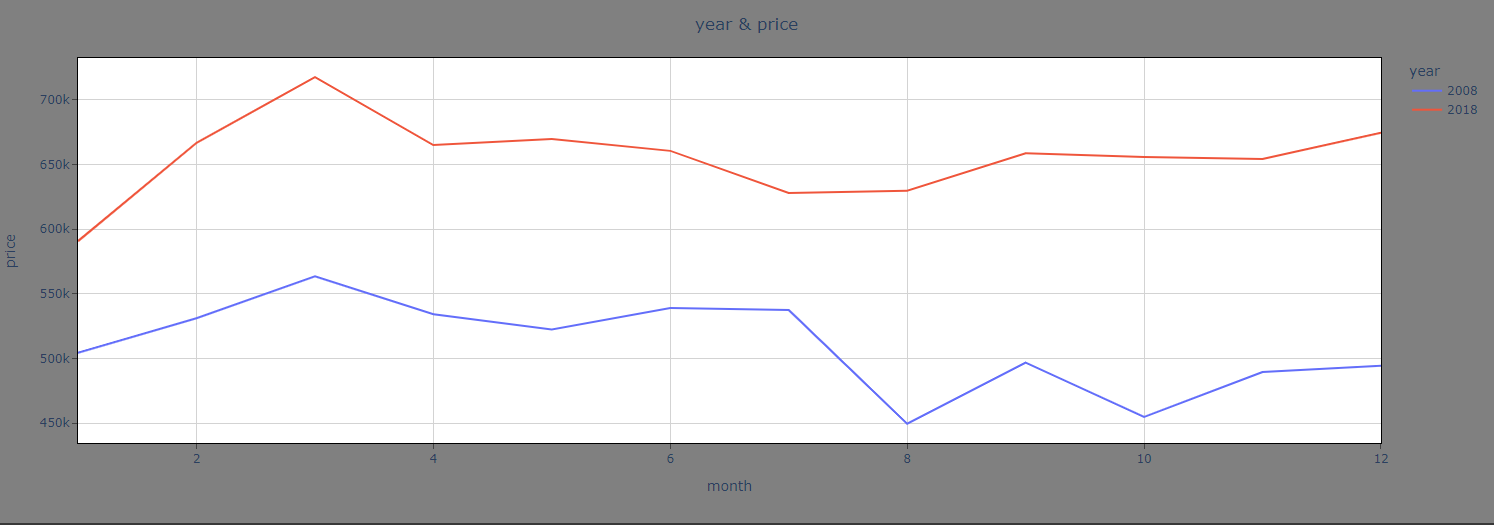

In [ ]:
import plotly.io as pio
pio.templates

Templates configuration
-----------------------
    Default template: 'plotly'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

In [ ]:
import plotly.io as pio

pio.templates.default = "plotly_white"
fig  = px.line(result, x = "month", y = "price", title="year & price", color = "year")
fig.update_layout(
    # dictionary
)
fig.show()

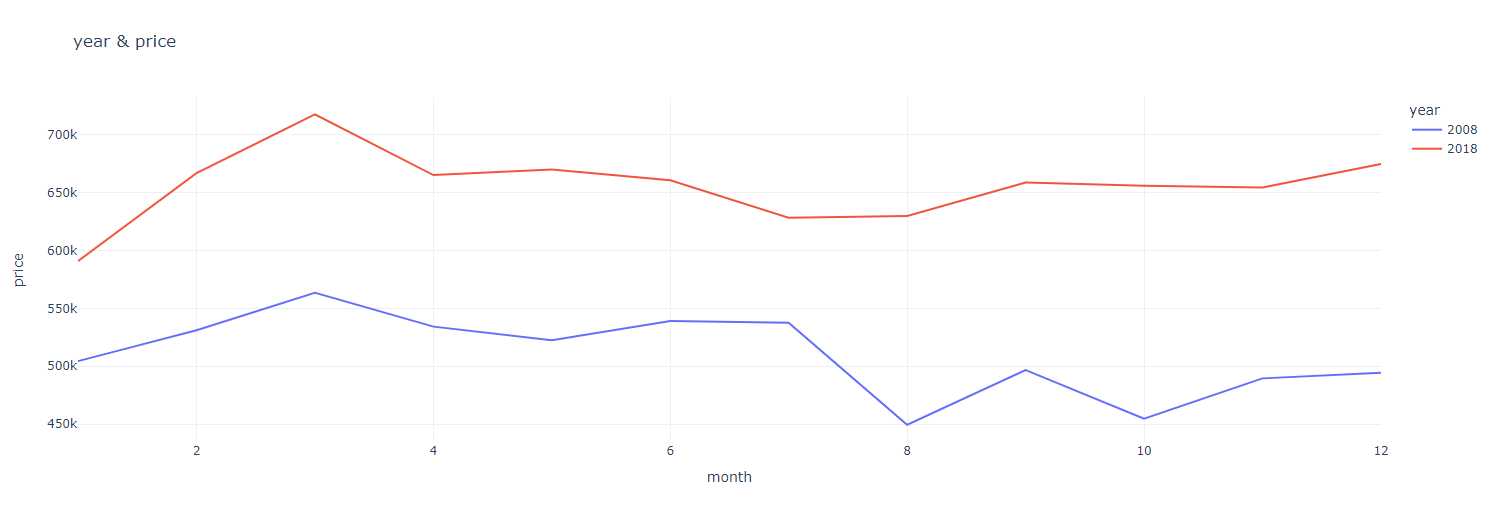

### 그래프 꾸미 (Bar Graph)

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio

result = sales[sales["year"].isin([2008, 2018])]
result = np.round(result.groupby(["year", "month"])["price"].agg(np.mean).reset_index(), 2)

pio.templates.default = "plotly_white"

fig = make_subplots(rows=3, cols=1, subplot_titles=("1 Chart", "2 Chart", "3 Chart"))
colors = ["steelblue","firebrick"]

for i, year in enumerate([2008, 2018]):
  data = result[result["year"] == year]
  fig.add_trace(go.Bar(x = data["month"],
                       y=data["price"],
                       name =str(year),
                       marker_color=colors[i]))

for i, year in enumerate([2008, 2018]):
  data = result[result["year"] == year]
  fig.add_trace(go.Bar(x = data["month"],
                       y=data["price"],
                       name =str(year),
                       marker_color=colors[i]),
                row=i+2, col=1)

fig.show()

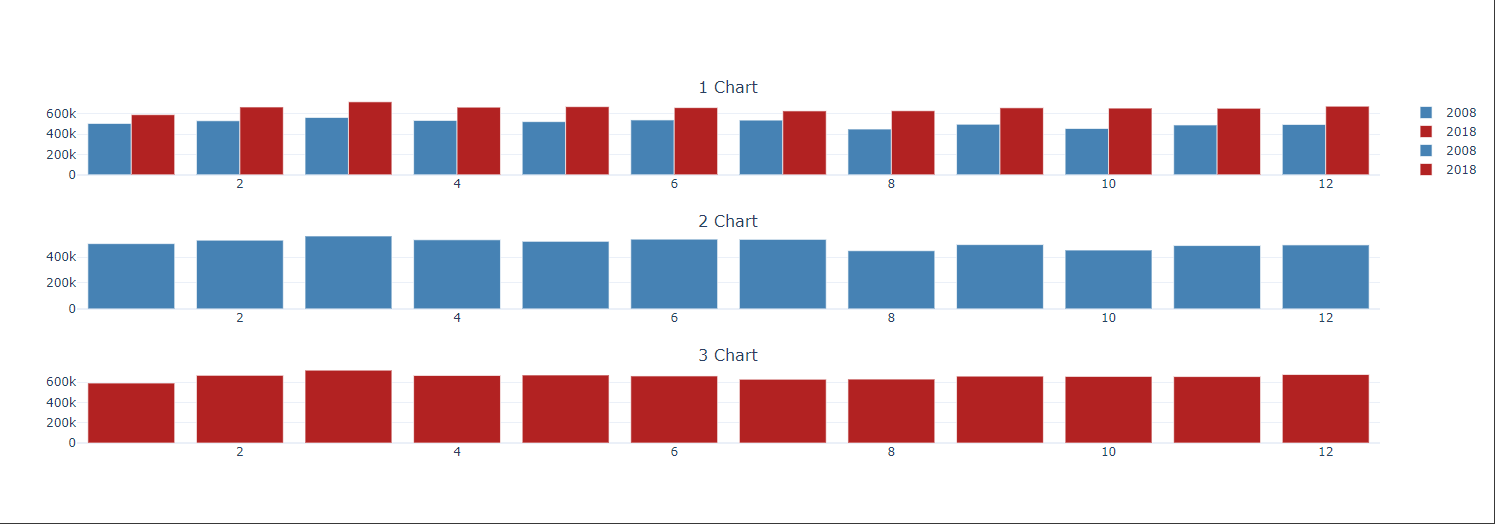

In [ ]:
# px.box()
# x축 : 2007, 2008, 2009, 2010
# y축 : price
# propertyType 기준으로 : house, unit
# 이상치 제거

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio

result = sales[sales["year"].isin([2007, 2008, 2009, 2010])]
result = result[(result["price"] <= result.describe()["price"]["75%"]) & (result["price"] >= result.describe()["price"]["25%"])]

fig  = px.box(result, x = "year", y = "price", title="year & price (group : propertyType)", color = "propertyType")
fig.show()

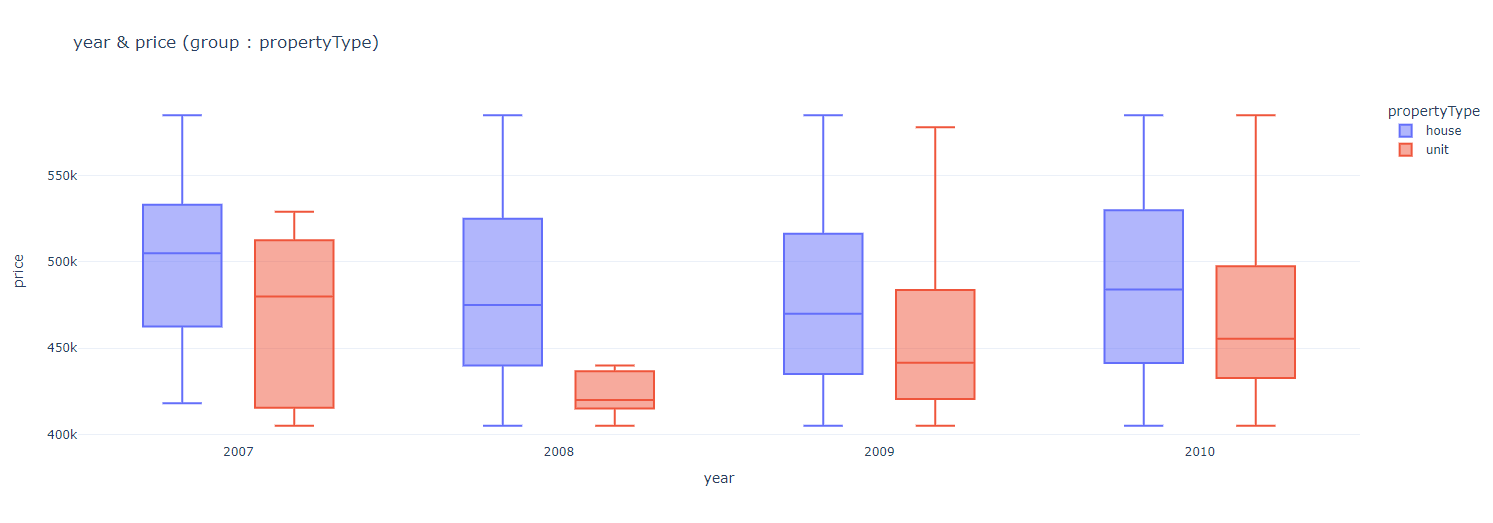